In [2]:

import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta

D:\anaconda\envs\books2\lib\site-packages\rqdatac\client.py:241: UserWarning: Your account will be expired after  68 days. Please call us at 0755-22676337 to upgrade or purchase or renew your contract.
  warnings.warn("Your account will be expired after  {} days. "


{'bytes_used': 0,
 'bytes_limit': 1073741824.0,
 'remaining_days': 68,
 'license_type': 'TRIAL'}

In [23]:
IBM = pd.read_csv('K线导出_IBM_日线数据.csv')
SPX = pd.read_csv('K线导出_SPX_日线数据.csv')
ALL = SPX.merge(IBM, on='交易时间', how='left').set_index('交易时间')

In [31]:
ALL

,开盘价_x,最高价_x,最低价_x,收盘价_x,涨跌_x,涨跌幅%_x,成交量_x,成交额_x,开盘价_y,最高价_y,最低价_y,收盘价_y,涨跌_y,涨跌幅%_y,成交量_y,成交额_y
交易时间,,,,,,,,,,,,,,,,
1997-01-02,740.74,742.81,729.55,737.01,0.00,0.00,0.0,0.0,19.11,19.18,18.67,19.04,0.00,0.00,16790000.0,0.000000e+00
1997-01-03,737.01,748.24,737.01,748.03,11.02,1.50,0.0,0.0,19.26,19.77,19.25,19.77,0.73,3.84,12930400.0,0.000000e+00
1997-01-06,748.03,753.31,743.82,747.65,-0.38,-0.05,0.0,0.0,19.81,20.30,19.70,20.04,0.26,1.33,19244400.0,0.000000e+00
1997-01-07,747.65,753.26,742.18,753.23,5.58,0.75,0.0,0.0,19.99,20.35,19.81,20.30,0.26,1.32,10541200.0,0.000000e+00
1997-01-08,753.23,755.72,747.71,748.41,-4.82,-0.64,0.0,0.0,20.40,20.41,19.77,19.87,-0.43,-2.14,11697600.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-16,6063.79,6085.19,6059.14,6074.08,22.99,0.38,0.0,0.0,230.73,231.03,226.88,229.33,-1.49,-0.65,3610257.0,8.257908e+08
2024-12-17,6052.55,6057.68,6035.19,6050.61,-23.47,-0.39,0.0,0.0,229.23,230.20,227.62,228.97,-0.36,-0.16,3651346.0,8.361010e+08
2024-12-18,6047.65,6070.67,5867.79,5872.16,-178.45,-2.95,0.0,0.0,229.04,229.04,220.03,220.17,-8.80,-3.84,4152517.0,9.257798e+08


In [34]:
import numpy as np
import pandas as pd
from scipy.stats import jarque_bera
from statsmodels.tsa.stattools import adfuller, acf

# Example time series data
# Replace this with your actual time series data
time_series = ALL['涨跌幅%_x'].fillna(0).values
# Jarque-Bera test
jb_stat, jb_p = jarque_bera(time_series)
print(f"Jarque-Bera test statistic: {jb_stat}, p-value: {jb_p}")

# Autocorrelation at lag 1 and lag 2
acf_values = acf(time_series, nlags=2)
lag1 = acf_values[1]
lag2 = acf_values[2]
print(f"Lag 1 autocorrelation: {lag1}")
print(f"Lag 2 autocorrelation: {lag2}")

# Augmented Dickey-Fuller test
adf_result = adfuller(time_series)
adf_stat = adf_result[0]
adf_p = adf_result[1]
print(f"ADF test statistic: {adf_stat}, p-value: {adf_p}")

Jarque-Bera test statistic: 26952.511743282615, p-value: 0.0
Lag 1 autocorrelation: -0.0927736911607621
Lag 2 autocorrelation: -0.010517786053992912
ADF test statistic: -15.86142787948941, p-value: 9.202300148631202e-29


D:\anaconda\envs\books2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  func(*args, **kwargs)
D:\anaconda\envs\books2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26131 (\N{CJK UNIFIED IDEOGRAPH-6613}) missing from current font.
  func(*args, **kwargs)
D:\anaconda\envs\books2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  func(*args, **kwargs)
D:\anaconda\envs\books2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  func(*args, **kwargs)
D:\anaconda\envs\books2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\books2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: 

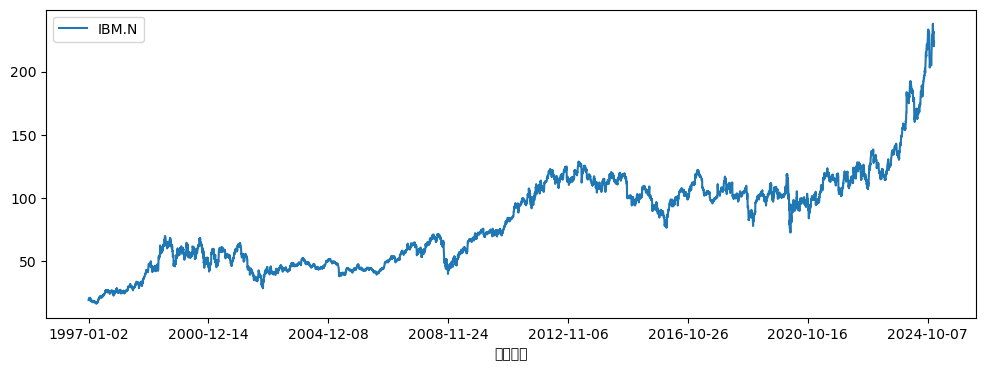

In [29]:
import matplotlib.pyplot as plt
ALL['收盘价_y'].plot(figsize=(12, 4))
plt.legend(['IBM.N'], loc='upper left')


D:\anaconda\envs\books2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  func(*args, **kwargs)
D:\anaconda\envs\books2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26131 (\N{CJK UNIFIED IDEOGRAPH-6613}) missing from current font.
  func(*args, **kwargs)
D:\anaconda\envs\books2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  func(*args, **kwargs)
D:\anaconda\envs\books2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  func(*args, **kwargs)
D:\anaconda\envs\books2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\books2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: 

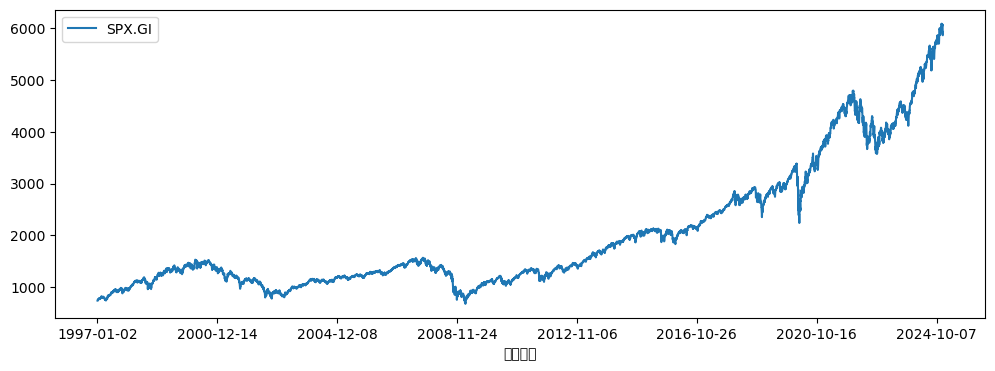

In [30]:
import matplotlib.pyplot as plt
ALL['收盘价_x'].plot(figsize=(12, 4))
plt.legend(['SPX.GI'], loc='upper left')

In [110]:
ALL

,交易时间,开盘价_x,最高价_x,最低价_x,收盘价_x,涨跌_x,涨跌幅%_x,成交量_x,成交额_x,开盘价_y,最高价_y,最低价_y,收盘价_y,涨跌_y,涨跌幅%_y,成交量_y,成交额_y
0,1/3/2005,45.92,46.01,45.82,45.95,0.00,0.00,479600.0,0.000000e+00,1628.75,1635.45,1598.79,1603.51,-17.61,-1.09,2.193130e+09,0.0
1,1/4/2005,45.97,45.99,45.80,45.90,-0.04,-0.10,190500.0,0.000000e+00,1611.22,1612.78,1565.02,1571.83,-31.68,-1.98,2.690460e+09,0.0
2,1/5/2005,45.86,45.93,45.79,45.88,-0.02,-0.04,69900.0,0.000000e+00,1568.68,1580.88,1562.64,1563.76,-8.07,-0.51,2.375380e+09,0.0
3,1/6/2005,45.90,45.93,45.85,45.92,0.03,0.07,75400.0,0.000000e+00,1567.66,1570.75,1556.84,1557.52,-6.24,-0.40,2.174220e+09,0.0
4,1/7/2005,45.94,45.96,45.82,45.90,-0.01,-0.03,137000.0,0.000000e+00,1565.63,1577.76,1551.29,1564.81,7.29,0.47,2.191910e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,12/13/2024,97.88,97.91,97.55,97.60,-0.37,-0.38,6566351.0,6.434272e+08,21789.65,21886.74,21646.09,21780.25,164.98,0.76,6.028250e+09,0.0
5021,12/16/2024,97.75,97.78,97.57,97.69,0.09,0.09,7124119.0,6.980948e+08,21891.36,22133.22,21879.74,22096.66,316.41,1.45,8.855040e+09,0.0
5022,12/17/2024,97.68,97.81,97.63,97.69,0.00,0.00,7239282.0,7.096405e+08,22003.64,22062.00,21921.21,22001.08,-95.58,-0.43,9.534350e+09,0.0
5023,12/18/2024,97.66,97.80,96.90,96.95,-0.74,-0.76,14261483.0,1.388051e+09,21979.53,22038.08,21146.83,21209.32,-791.76,-3.60,9.996120e+09,0.0


In [133]:
Seq1 = ALL.loc['1/3/2012':'12/30/2019']